EDA

First 5 rows:
       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN

Missing values:
 timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64

Unique event types: ['view' 'addtocart' 'transaction']


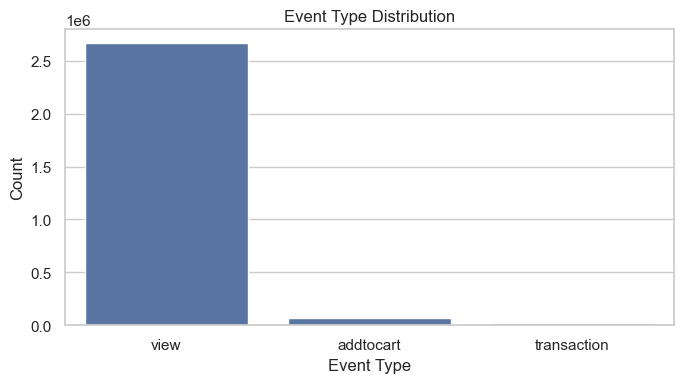

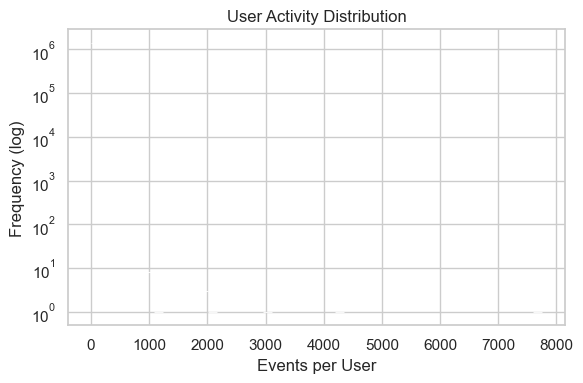

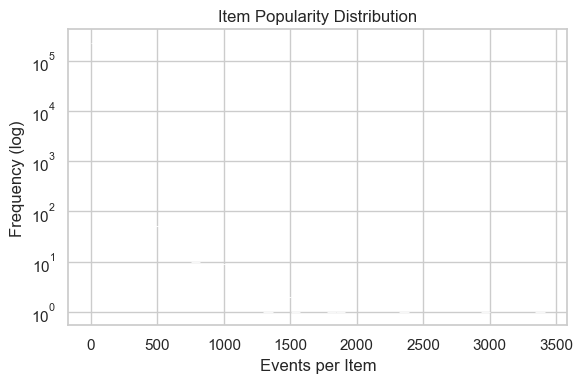

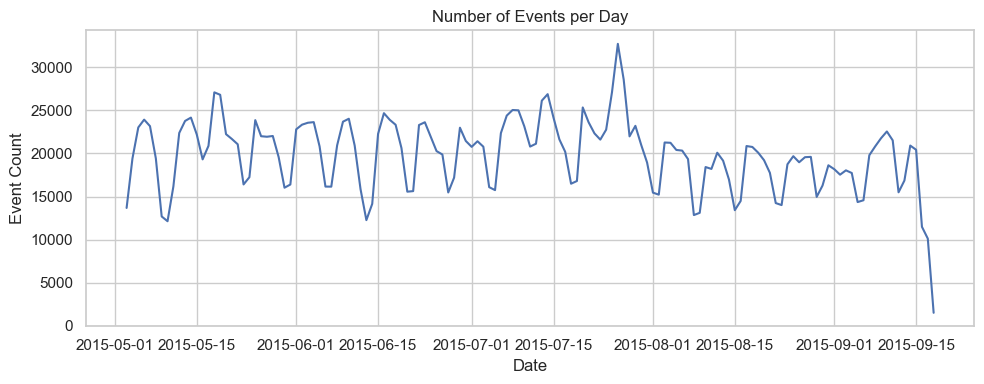

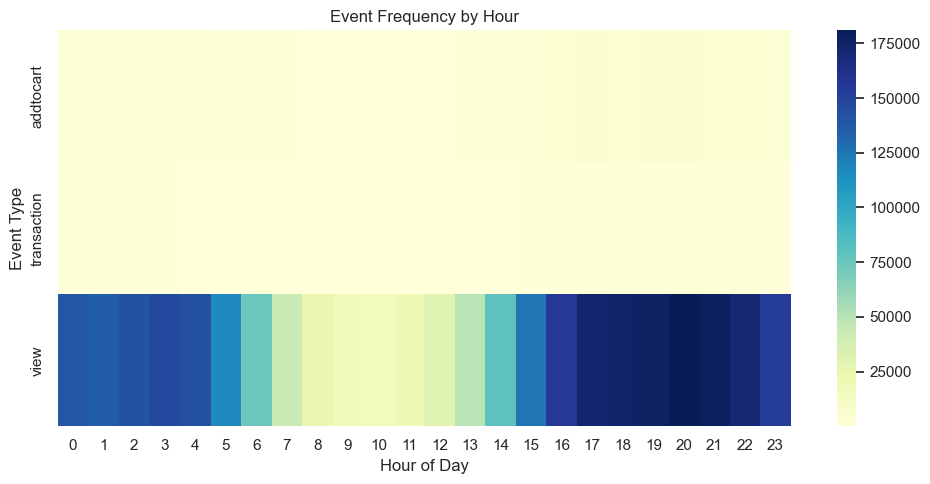

In [8]:
# EDA: RetailRocket Event Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 📥 Load dataset
events_path = "../data/raw/events.csv"
df = pd.read_csv(events_path)

# 📌 Preview
print("First 5 rows:")
print(df.head())
print("\nMissing values:\n", df.isnull().sum())
print("\nUnique event types:", df["event"].unique())

# 🕒 Convert timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='ms')
df["date"] = df["timestamp"].dt.date
df["hour"] = df["timestamp"].dt.hour

# 📊 1. Distribution of Event Types
plt.figure(figsize=(7,4))
sns.countplot(x="event", data=df, order=df["event"].value_counts().index)
plt.title("Event Type Distribution")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 📊 2. User Activity Distribution
user_event_counts = df["visitorid"].value_counts()
plt.figure(figsize=(6,4))
sns.histplot(user_event_counts, bins=50, log_scale=(False, True))
plt.title("User Activity Distribution")
plt.xlabel("Events per User")
plt.ylabel("Frequency (log)")
plt.tight_layout()
plt.show()

# 📊 3. Item Popularity
item_event_counts = df["itemid"].value_counts()
plt.figure(figsize=(6,4))
sns.histplot(item_event_counts, bins=50, log_scale=(False, True))
plt.title("Item Popularity Distribution")
plt.xlabel("Events per Item")
plt.ylabel("Frequency (log)")
plt.tight_layout()
plt.show()

# 📈 4. Timeline of Events (Daily)
daily_events = df.groupby("date").size()
plt.figure(figsize=(10,4))
daily_events.plot()
plt.title("Number of Events per Day")
plt.xlabel("Date")
plt.ylabel("Event Count")
plt.tight_layout()
plt.show()

# 🧪 Optional: Event Heatmap by Hour & Event Type
event_hour = df.groupby(["hour", "event"]).size().unstack().fillna(0)
plt.figure(figsize=(10,5))
sns.heatmap(event_hour.T, cmap="YlGnBu", annot=False)
plt.title("Event Frequency by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Event Type")
plt.tight_layout()
plt.show()
